In [1]:
import pandas as pd
import numpy as np
import math
from textblob import TextBlob as tb
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
july=pd.read_csv('JULYFINALTWEET(RAW).csv')

In [4]:
july.columns

Index(['Unnamed: 0', 'created_at', 'username', 'tweet', 'language',
       'replies_count', 'retweets_count', 'likes_count'],
      dtype='object')

In [5]:
july.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
july.columns

Index(['created_at', 'username', 'tweet', 'language', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

In [7]:
july['language'].unique()

array(['in', 'en', 'th', 'hi', 'ar', 'ja', 'et', 'und', 'ca', 'ht', 'tl',
       'fr', 'pl', 'bn', 'mr', 'ne', 'ur', 'ru', 'da', 'es', 'fa', 'ml',
       'pt', 'vi', 'ta', 'tr', 'nl', 'or', 'gu', 'it', 'ro', 'de', 'fi',
       'cs', 'my', 'lt'], dtype=object)

In [8]:
july['language'].value_counts()

en     2224
in      459
hi      258
und     153
th       67
es       49
ar       44
tl       31
ca       20
ja       16
et       16
lt       13
ta       11
ur       11
mr        9
bn        9
fr        8
vi        6
ht        5
ne        4
ru        4
pt        3
pl        3
da        3
fa        2
tr        2
nl        2
or        2
gu        2
it        2
ro        2
fi        2
cs        2
ml        1
de        1
my        1
Name: language, dtype: int64

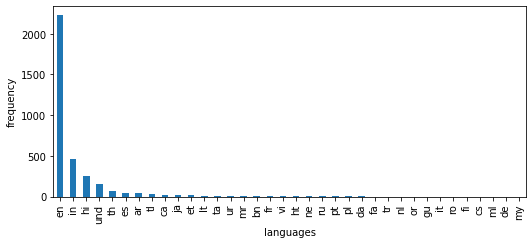

In [9]:
list1=np.array
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
list1=july['language'].value_counts().plot(ax=ax, kind='bar', xlabel='languages', ylabel='frequency')
plt.show()

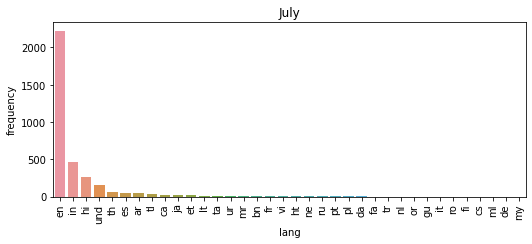

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
lang=july['language'].value_counts().rename_axis('lang').reset_index(name='frequency')
ax = sns.barplot(x="lang", y="frequency", data=lang)
plt.title("July")
plt.xticks(rotation=90)
plt.show()

In [11]:
lang.shape

(36, 2)

In [9]:
for i in july['language']:
    index_names = july[july['language']!='en' ].index
    july.drop(index_names, inplace = True)

In [10]:
july.shape

(2224, 7)

In [11]:
duplicates = july[july.duplicated()]
duplicates.shape

(231, 7)

In [12]:
july=july.drop_duplicates(keep='first')
july.shape

(1993, 7)

In [13]:
july

,created_at,username,tweet,language,replies_count,retweets_count,likes_count
5,2021-07-03 04:46:08 India Standard Time,scchabba,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,en,0.0,0.0,0
8,2021-07-03 04:12:47 India Standard Time,chungakabasil,Uggah: Sarawak still free of Covid-19 Delta va...,en,0.0,0.0,1
10,2021-07-05 04:54:09 India Standard Time,ombutolia,@RomainSandro Following Covid 19 guidelines.,en,0.0,0.0,0
11,2021-07-05 04:49:20 India Standard Time,anuj_dce,"My parents, senior citizens and vaccinated are...",en,1.0,0.0,0
13,2021-07-05 03:07:15 India Standard Time,dr_afzalhaqasif,"Fast-spreading Delta Variant, Vaccination Rate...",en,0.0,0.0,0
...,...,...,...,...,...,...,...
3439,2021-07-01T12:55:53.000Z,Tirthankar Das,Double #Covid vaccines seems to protect agains...,en,NaN,NaN,NaN
3440,2021-07-01T08:29:17.000Z,Debapriya Ghosh Goswami,Done with both the doses of Covid 19 vaccine.\...,en,1.0,NaN,1.0
3441,2021-07-01T07:02:34.000Z,Kaushik Mukherjee,Saluting the real worriers of COVID 19….\n#doc...,en,NaN,NaN,1.0
3442,2021-07-01T06:21:18.000Z,manoj w,@HardeepSPuri\n sir passengers who have been f...,en,NaN,NaN,NaN


In [14]:
july.columns

Index(['created_at', 'username', 'tweet', 'language', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

In [15]:
july[['replies_count','retweets_count', 'likes_count']]=july[['replies_count','retweets_count', 'likes_count']].fillna(0)

In [16]:
july

,created_at,username,tweet,language,replies_count,retweets_count,likes_count
5,2021-07-03 04:46:08 India Standard Time,scchabba,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,en,0.0,0.0,0
8,2021-07-03 04:12:47 India Standard Time,chungakabasil,Uggah: Sarawak still free of Covid-19 Delta va...,en,0.0,0.0,1
10,2021-07-05 04:54:09 India Standard Time,ombutolia,@RomainSandro Following Covid 19 guidelines.,en,0.0,0.0,0
11,2021-07-05 04:49:20 India Standard Time,anuj_dce,"My parents, senior citizens and vaccinated are...",en,1.0,0.0,0
13,2021-07-05 03:07:15 India Standard Time,dr_afzalhaqasif,"Fast-spreading Delta Variant, Vaccination Rate...",en,0.0,0.0,0
...,...,...,...,...,...,...,...
3439,2021-07-01T12:55:53.000Z,Tirthankar Das,Double #Covid vaccines seems to protect agains...,en,0.0,0.0,0
3440,2021-07-01T08:29:17.000Z,Debapriya Ghosh Goswami,Done with both the doses of Covid 19 vaccine.\...,en,1.0,0.0,1.0
3441,2021-07-01T07:02:34.000Z,Kaushik Mukherjee,Saluting the real worriers of COVID 19….\n#doc...,en,0.0,0.0,1.0
3442,2021-07-01T06:21:18.000Z,manoj w,@HardeepSPuri\n sir passengers who have been f...,en,0.0,0.0,0


In [17]:
JulyTweet=july[['tweet','language']]

In [18]:
JulyTweet

,tweet,language
5,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,en
8,Uggah: Sarawak still free of Covid-19 Delta va...,en
10,@RomainSandro Following Covid 19 guidelines.,en
11,"My parents, senior citizens and vaccinated are...",en
13,"Fast-spreading Delta Variant, Vaccination Rate...",en
...,...,...
3439,Double #Covid vaccines seems to protect agains...,en
3440,Done with both the doses of Covid 19 vaccine.\...,en
3441,Saluting the real worriers of COVID 19….\n#doc...,en
3442,@HardeepSPuri\n sir passengers who have been f...,en


In [19]:
JulyTweet=JulyTweet.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

In [20]:
JulyTweet

,index,tweet,language
0,5,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,en
1,8,Uggah: Sarawak still free of Covid-19 Delta va...,en
2,10,@RomainSandro Following Covid 19 guidelines.,en
3,11,"My parents, senior citizens and vaccinated are...",en
4,13,"Fast-spreading Delta Variant, Vaccination Rate...",en
...,...,...,...
1988,3439,Double #Covid vaccines seems to protect agains...,en
1989,3440,Done with both the doses of Covid 19 vaccine.\...,en
1990,3441,Saluting the real worriers of COVID 19….\n#doc...,en
1991,3442,@HardeepSPuri\n sir passengers who have been f...,en


In [21]:
JulyTweet.drop(['index'],axis=1,inplace=True)

In [22]:
JulyTweet

,tweet,language
0,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,en
1,Uggah: Sarawak still free of Covid-19 Delta va...,en
2,@RomainSandro Following Covid 19 guidelines.,en
3,"My parents, senior citizens and vaccinated are...",en
4,"Fast-spreading Delta Variant, Vaccination Rate...",en
...,...,...
1988,Double #Covid vaccines seems to protect agains...,en
1989,Done with both the doses of Covid 19 vaccine.\...,en
1990,Saluting the real worriers of COVID 19….\n#doc...,en
1991,@HardeepSPuri\n sir passengers who have been f...,en


In [23]:
JulyTweet.to_csv('JulyTweet.csv')

### --------extract HASTAGS--------- ###

In [24]:
JulyTweet['hastags']=np.nan

In [25]:
def extract_hastags(text,i=0):
    hashtag_list = []
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[0:])
    JulyTweet['hastags'][i]=hashtag_list
    i+=1


In [26]:
index=JulyTweet.index
print(index)

RangeIndex(start=0, stop=1993, step=1)


In [27]:
extract_hastags(JulyTweet['tweet'][8],8)

<ipython-input-25-30f7a2f19440>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JulyTweet['hastags'][i]=hashtag_list
C:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
JulyTweet['hastags'][8]

['#VACCINATIONRACE']

In [29]:
for i in range(0,1993):
    text=JulyTweet['tweet'][i]
    extract_hastags(text,i)


In [30]:
JulyTweet['hastags']

0                                                      []
1                                                      []
2                                                      []
3                                                      []
4                                                      []
                              ...                        
1988    [#Covid, #DeltaVariant, #COVID19, #coronavirus...
1989                                        [#Vaccinated]
1990    [#doctor, #health, #heal, #positivevibes, #hap...
1991                                [#vaccinated, #COVID]
1992    [#DoctorsDay, #NationalDoctorsDay, #grateful, ...
Name: hastags, Length: 1993, dtype: object

### ---- Extract @texts ----

In [31]:
JulyTweet['attherate']=np.nan

In [32]:
def extract_attherate(text,i=0):
    attherate_list = []
    for word in text.split():
        if word[0] == '@':
            attherate_list.append(word[0:])
    JulyTweet['attherate'][i]=attherate_list
    i+=1

In [33]:
for i in range(0,1993):
    text=JulyTweet['tweet'][i]
    extract_attherate(text,i)


<ipython-input-32-7059c50e411a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JulyTweet['attherate'][i]=attherate_list


In [34]:
JulyTweet['attherate']

0       [@anileshmahajan, @tsrawatbjp, @TIRATHSRAWAT, ...
1                                                      []
2                                         [@RomainSandro]
3                    [@PMOIndia, @AiFlywith, @airindiain]
4                                             [@medscape]
                              ...                        
1988                                                   []
1989                                                   []
1990                                                  [@]
1991                                      [@HardeepSPuri]
1992                                                   []
Name: attherate, Length: 1993, dtype: object

In [35]:
JulyTweet.to_csv('JulyTweet.csv')

### ----Extracting URLs----

In [36]:
JulyTweet['urls']=np.nan

In [37]:
def extract_urls(text,i=0):
    attherate_list = []
    for word in text.split():
        if word[0:5] == 'https':
            attherate_list.append(word[0:])
    JulyTweet['urls'][i]=attherate_list
    i+=1

In [38]:
JulyTweet['tweet'][1]

'Uggah: Sarawak still free of Covid-19 Delta variant    https://t.co/BtjONCXGgI'

In [39]:
extract_urls(JulyTweet['tweet'][1],1)

<ipython-input-37-1678ac7306fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JulyTweet['urls'][i]=attherate_list


In [40]:
JulyTweet['urls'][1]

['https://t.co/BtjONCXGgI']

In [41]:
for i in range(0,1993):
    text=JulyTweet['tweet'][i]
    extract_urls(text,i)


In [42]:
JulyTweet['urls']

0                                  []
1           [https://t.co/BtjONCXGgI]
2                                  []
3                                  []
4           [https://t.co/Aia0dGOybP]
                    ...              
1988                               []
1989                               []
1990                               []
1991                               []
1992    [https://lafiestacatering.in]
Name: urls, Length: 1993, dtype: object

In [43]:
JulyTweet.to_csv('JulyTweet.csv')

In [44]:
JulyTweet

,tweet,language,hastags,attherate,urls
0,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,en,[],"[@anileshmahajan, @tsrawatbjp, @TIRATHSRAWAT, ...",[]
1,Uggah: Sarawak still free of Covid-19 Delta va...,en,[],[],[https://t.co/BtjONCXGgI]
2,@RomainSandro Following Covid 19 guidelines.,en,[],[@RomainSandro],[]
3,"My parents, senior citizens and vaccinated are...",en,[],"[@PMOIndia, @AiFlywith, @airindiain]",[]
4,"Fast-spreading Delta Variant, Vaccination Rate...",en,[],[@medscape],[https://t.co/Aia0dGOybP]
...,...,...,...,...,...
1988,Double #Covid vaccines seems to protect agains...,en,"[#Covid, #DeltaVariant, #COVID19, #coronavirus...",[],[]
1989,Done with both the doses of Covid 19 vaccine.\...,en,[#Vaccinated],[],[]
1990,Saluting the real worriers of COVID 19….\n#doc...,en,"[#doctor, #health, #heal, #positivevibes, #hap...",[@],[]
1991,@HardeepSPuri\n sir passengers who have been f...,en,"[#vaccinated, #COVID]",[@HardeepSPuri],[]


In [45]:
JulyTweet['tokenized_Tweet']=np.nan

In [46]:
def tokenizing(text,i=0):
    text=tb(text)
    token_text=text.words
    token_text
    JulyTweet['tokenized_Tweet'][i]=token_text

In [47]:
tokenizing(JulyTweet['tweet'][0],0)

<ipython-input-46-93d54fe794c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JulyTweet['tokenized_Tweet'][i]=token_text
C:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
JulyTweet['tokenized_Tweet'][0]

WordList(['anileshmahajan', 'tsrawatbjp', 'TIRATHSRAWAT', 'BJP4India', 'It', 'is', 'showing', 'complete', 'mess', 'in', 'power', 'hierarchy', 'of', 'BJP', 'which', 'is', 'seemingly', 'rattled', 'by', 'inappropriate', 'handling', 'of', 'covid', '2nd', 'wave'])

In [49]:
JulyTweet['tweet'][0]

'@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP4India It is showing complete mess in power hierarchy of BJP which is seemingly rattled by inappropriate handling of covid 2nd wave .'

In [50]:
for i in range(0,1993):
    text=JulyTweet['tweet'][i]
    tokenizing(text,i)

In [51]:
JulyTweet['tokenized_Tweet']

0       [anileshmahajan, tsrawatbjp, TIRATHSRAWAT, BJP...
1       [Uggah, Sarawak, still, free, of, Covid-19, De...
2        [RomainSandro, Following, Covid, 19, guidelines]
3       [My, parents, senior, citizens, and, vaccinate...
4       [Fast-spreading, Delta, Variant, Vaccination, ...
                              ...                        
1988    [Double, Covid, vaccines, seems, to, protect, ...
1989    [Done, with, both, the, doses, of, Covid, 19, ...
1990    [Saluting, the, real, worriers, of, COVID, 19…...
1991    [HardeepSPuri, sir, passengers, who, have, bee...
1992    [“, Warm, wishes, on, Doctor, ’, s, Day, to, a...
Name: tokenized_Tweet, Length: 1993, dtype: object

In [52]:
JulyTweet.to_csv('JulyTweet.csv')

In [53]:
JulyTweet

,tweet,language,hastags,attherate,urls,tokenized_Tweet
0,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,en,[],"[@anileshmahajan, @tsrawatbjp, @TIRATHSRAWAT, ...",[],"[anileshmahajan, tsrawatbjp, TIRATHSRAWAT, BJP..."
1,Uggah: Sarawak still free of Covid-19 Delta va...,en,[],[],[https://t.co/BtjONCXGgI],"[Uggah, Sarawak, still, free, of, Covid-19, De..."
2,@RomainSandro Following Covid 19 guidelines.,en,[],[@RomainSandro],[],"[RomainSandro, Following, Covid, 19, guidelines]"
3,"My parents, senior citizens and vaccinated are...",en,[],"[@PMOIndia, @AiFlywith, @airindiain]",[],"[My, parents, senior, citizens, and, vaccinate..."
4,"Fast-spreading Delta Variant, Vaccination Rate...",en,[],[@medscape],[https://t.co/Aia0dGOybP],"[Fast-spreading, Delta, Variant, Vaccination, ..."
...,...,...,...,...,...,...
1988,Double #Covid vaccines seems to protect agains...,en,"[#Covid, #DeltaVariant, #COVID19, #coronavirus...",[],[],"[Double, Covid, vaccines, seems, to, protect, ..."
1989,Done with both the doses of Covid 19 vaccine.\...,en,[#Vaccinated],[],[],"[Done, with, both, the, doses, of, Covid, 19, ..."
1990,Saluting the real worriers of COVID 19….\n#doc...,en,"[#doctor, #health, #heal, #positivevibes, #hap...",[@],[],"[Saluting, the, real, worriers, of, COVID, 19…..."
1991,@HardeepSPuri\n sir passengers who have been f...,en,"[#vaccinated, #COVID]",[@HardeepSPuri],[],"[HardeepSPuri, sir, passengers, who, have, bee..."


### ------Removing stopwords------- ###

In [55]:
JulyTweet['filteredToken']=np.nan

In [60]:
text_set=set(JulyTweet['tokenized_Tweet'][0])
stop_set=set(stopwords.words("english"))
JulyTweet['filteredToken'][0]=list(text_set-stop_set)

<ipython-input-60-bf3403e0181f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JulyTweet['filteredToken'][0]=list(text_set-stop_set)
C:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
JulyTweet['tokenized_Tweet'][0]

WordList(['anileshmahajan', 'tsrawatbjp', 'TIRATHSRAWAT', 'BJP4India', 'It', 'is', 'showing', 'complete', 'mess', 'in', 'power', 'hierarchy', 'of', 'BJP', 'which', 'is', 'seemingly', 'rattled', 'by', 'inappropriate', 'handling', 'of', 'covid', '2nd', 'wave'])

In [61]:
JulyTweet['filteredToken'][0]

['anileshmahajan',
 'BJP',
 'rattled',
 'inappropriate',
 'complete',
 'tsrawatbjp',
 'handling',
 'wave',
 'It',
 'showing',
 'seemingly',
 '2nd',
 'BJP4India',
 'TIRATHSRAWAT',
 'covid',
 'power',
 'hierarchy',
 'mess']

In [63]:
stop_set=set(stopwords.words("english"))
for i in range(0,1993):
    text_set=set(JulyTweet['tokenized_Tweet'][i])
    JulyTweet['filteredToken'][i]=list(text_set-stop_set)#set difference operation

In [64]:
JulyTweet

,tweet,language,hastags,attherate,urls,tokenized_Tweet,filteredToken
0,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,en,[],"[@anileshmahajan, @tsrawatbjp, @TIRATHSRAWAT, ...",[],"[anileshmahajan, tsrawatbjp, TIRATHSRAWAT, BJP...","[anileshmahajan, BJP, rattled, inappropriate, ..."
1,Uggah: Sarawak still free of Covid-19 Delta va...,en,[],[],[https://t.co/BtjONCXGgI],"[Uggah, Sarawak, still, free, of, Covid-19, De...","[https, Sarawak, Covid-19, still, free, varian..."
2,@RomainSandro Following Covid 19 guidelines.,en,[],[@RomainSandro],[],"[RomainSandro, Following, Covid, 19, guidelines]","[Following, Covid, 19, RomainSandro, guidelines]"
3,"My parents, senior citizens and vaccinated are...",en,[],"[@PMOIndia, @AiFlywith, @airindiain]",[],"[My, parents, senior, citizens, and, vaccinate...","[PMOIndia, Blair, brother, parents, way, fligh..."
4,"Fast-spreading Delta Variant, Vaccination Rate...",en,[],[@medscape],[https://t.co/Aia0dGOybP],"[Fast-spreading, Delta, Variant, Vaccination, ...","[https, Variant, Weekly, Vaccination, Fast-spr..."
...,...,...,...,...,...,...,...
1988,Double #Covid vaccines seems to protect agains...,en,"[#Covid, #DeltaVariant, #COVID19, #coronavirus...",[],[],"[Double, Covid, vaccines, seems, to, protect, ...","[European, VACCINE, Medicines, AFP, reports, A..."
1989,Done with both the doses of Covid 19 vaccine.\...,en,[#Vaccinated],[],[],"[Done, with, both, the, doses, of, Covid, 19, ...","[Done, doses, vaccines, yet, please, ones, Tho..."
1990,Saluting the real worriers of COVID 19….\n#doc...,en,"[#doctor, #health, #heal, #positivevibes, #hap...",[@],[],"[Saluting, the, real, worriers, of, COVID, 19…...","[Saluting, worriers, faith, 19…, doctor, happy..."
1991,@HardeepSPuri\n sir passengers who have been f...,en,"[#vaccinated, #COVID]",[@HardeepSPuri],[],"[HardeepSPuri, sir, passengers, who, have, bee...","[going, sir, HardeepSPuri, formalities, fully,..."


In [65]:
JulyTweet.to_csv('JulyTweet_(with Emojis and other language within eng sentence).csv')